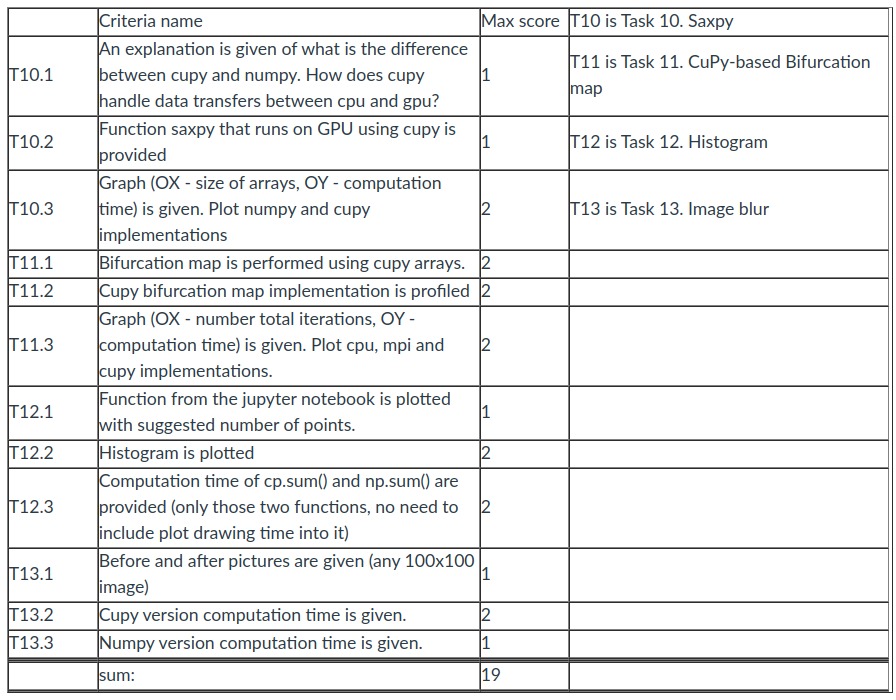

In [2]:
import cupy as cp
import numpy as np
import matplotlib.pyplot as plt

**Subtask 1: Function from the Jupiter notebook is plotted with suggested number of points**

$f(x) = [z^2(x) + z^3(x) -200z^4(x)]*  sin(10^5 (x+0.5))$

where $z(x) = sin(3x)-0.5$

In [3]:
@cp.fuse()
def f(x):
    return (cp.power(z(x),2) + cp.power(z(x),3) - 200 * cp.power(z(x),4)) * cp.sin(1e5 * (x + 0.5))

@cp.fuse()
def z(x):
    return cp.sin(3 * x) - 0.5

Let's plot it on the $x$ interval $[0,1]$ with $10^7$ samples 

Also lets find $f_{min}$ and $f_{max}$ on given interval 

In [4]:
start, end = 0, 1
points = 10**7
x = cp.linspace(start, end, points)
y = f(x)

f_min = y.min()
f_max = y.max()
delta = 0.1 * (f_max - f_min)

print('Min: {}. Max {}.'.format(f_min, f_max))

Min: -12.365544666168107. Max 12.374912294071224.


Then we split $y = f(x)$, in interval $[0,1]$ into 10 subintervals of length $\delta$ equal to $0.1 (f_{max}-f_{min})$: 

$[f_{min}, f_{min}+\delta]$ , $[f_{min} + \delta, f_{min}+2\delta]$, ... , $[f_{max} - \delta, f_{max}]$

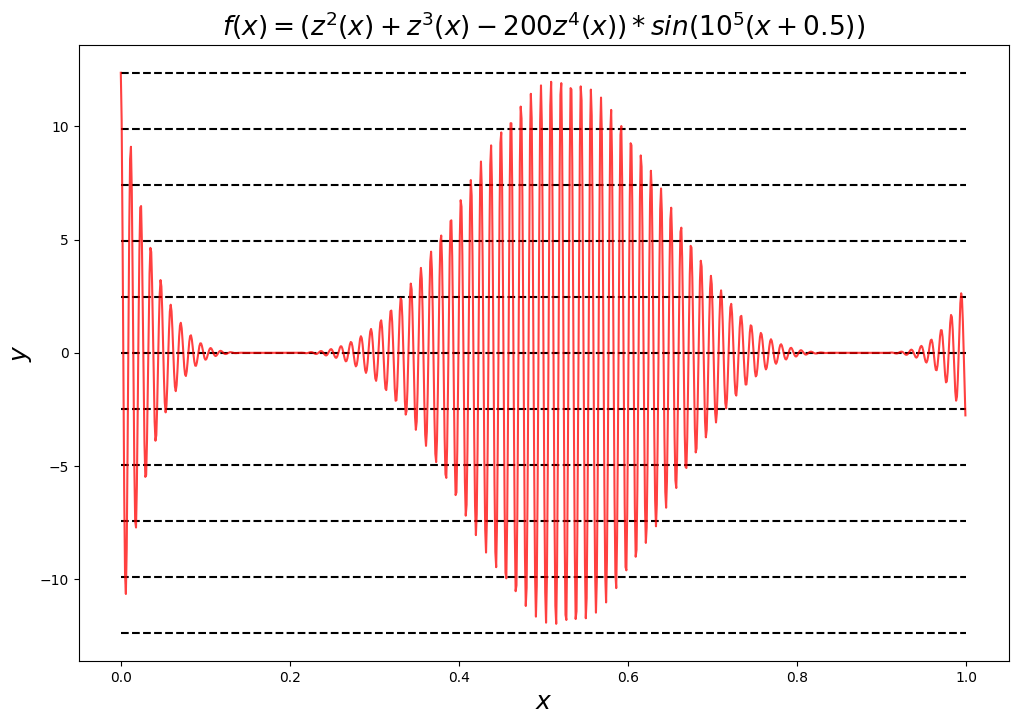

In [21]:
plt.style.use('default')
plt.figure(figsize=(12, 8))
plt.title("$f(x) = (z^2(x) + z^3(x) -200z^4(x))*  sin(10^5 (x+0.5))$", fontsize = 19)
plt.xlabel("$x$", fontsize = 18)
plt.ylabel("$y$", fontsize = 18)
plt.plot(x.get()[::10000], y.get()[::10000], color =  'red',  alpha = 0.75) # take each 10000th point to plot
plt.hlines([np.float(f_min + i * delta) for i in range(11)], 0, 1, linestyles='--');

**Subtask 2: Histogram is ploted**

Then lets compute number of $y=f(x)$ samples in each subinterval using `cp.sum()`

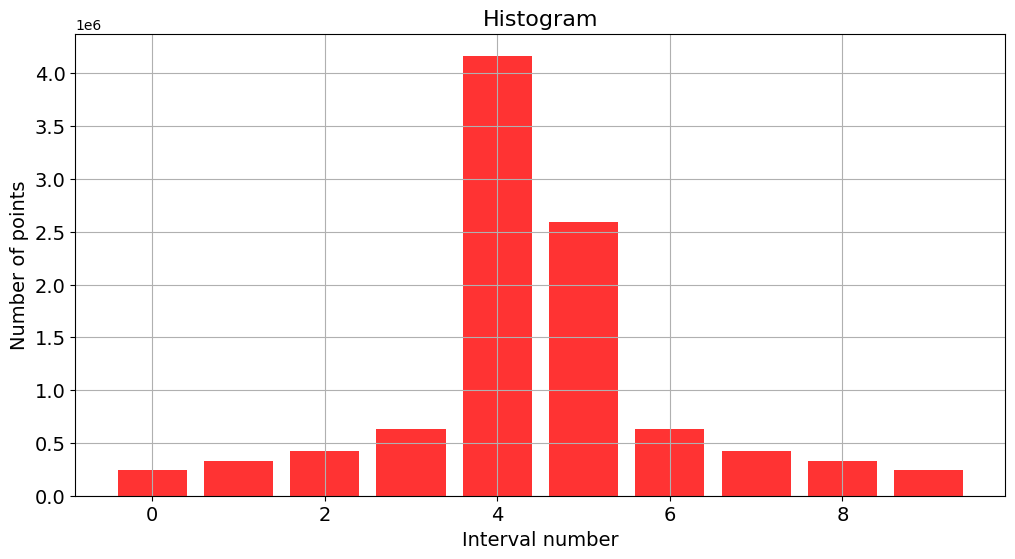

In [14]:
points_list = []
for i in range(10):
    in_points = ((f_min + (i+1)*delta) > y) & (y > (f_min + i*delta)) #
    in_points = cp.sum(in_points)
    in_points = cp.asnumpy(in_points)
    points_list.append(in_points)
points_list = np.array(points_list)

plt.figure(figsize=(12, 6))
plt.bar(np.arange(10),points_list, color = 'red', alpha = 0.8)
plt.title('Histogram', fontsize=16)
plt.xlabel('Interval number', fontsize=14)
plt.ylabel('Number of points', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.show()

**Subtask 3: Computation time of cp.sum() and np.sum() are provided (just functions without graph)**

In [6]:
i = 1
cp_in_points = ((f_min + (i+1)*delta) > y) & (y > (f_min + i*delta))
np_in_points = cp.asnumpy(cp_in_points)

In [7]:
%timeit -n 100 cp.sum(cp_in_points)

100 loops, best of 3: 15.9 µs per loop


In [8]:
%timeit -n 100 np.sum(np_in_points)

100 loops, best of 3: 8.69 ms per loop
